In [1]:
import SimpleITK as sitk
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import os
import numpy as np


refMask_path = './Reference/Reference_Mask.png'
ref_path = './Reference/Reference.png'
input_path = './Masks'
masks_dest = 'Masks_Registered_with_SimpleElastix'
pngs = './Pngs'


In [2]:
# creates a new folder if it does not already exist
def new_dir(dirName):
    try:
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")

# target and reference are assumed as sitk.Image arrays
def affine_registration(fixed, moving):
    
    parameterMap = sitk.GetDefaultParameterMap('affine')
    elastixImageFilter = sitk.ElastixImageFilter()
    elastixImageFilter.SetFixedImage(fixedImage)
    elastixImageFilter.SetMovingImage(movingImage)
    elastixImageFilter.SetParameterMap(parameterMap)
    elastixImageFilter.Execute()
    resultImage = elastixImageFilter.GetResultImage()
    transformParameterMap = elastixImageFilter.GetTransformParameterMap()
    return resultImage, transformParameterMap

def apply_transform(parameterMap, img):
    transformixImageFilter = sitk.TransformixImageFilter()
    transformixImageFilter.SetTransformParameterMap(parameterMap)
    transformixImageFilter.SetMovingImage(img)
    transformixImageFilter.Execute()
    resultImage = transformixImageFilter.GetResultImage()
    return resultImage
        

def IoU(img1, img2):
    intersection = np.logical_and(img1, img2)
    union = np.logical_or(img1, img2)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
    
  
  

test_file_1_Mask.png
test_file_2_Mask.png
test_file_3_Mask.png
test_file_4_Mask.png
test_file_5_Mask.png
test_file_6_Mask.png
Wall time: 2min 16s


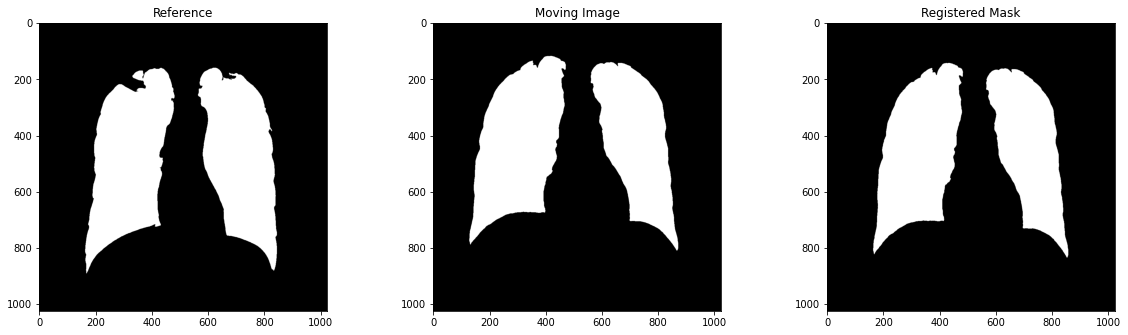

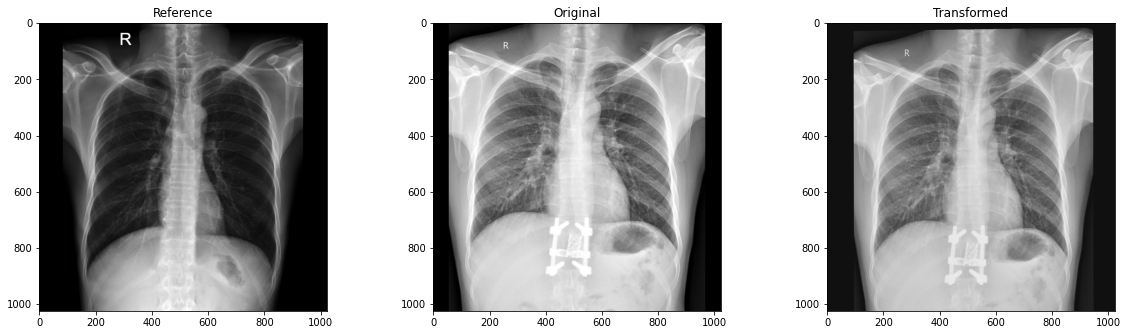

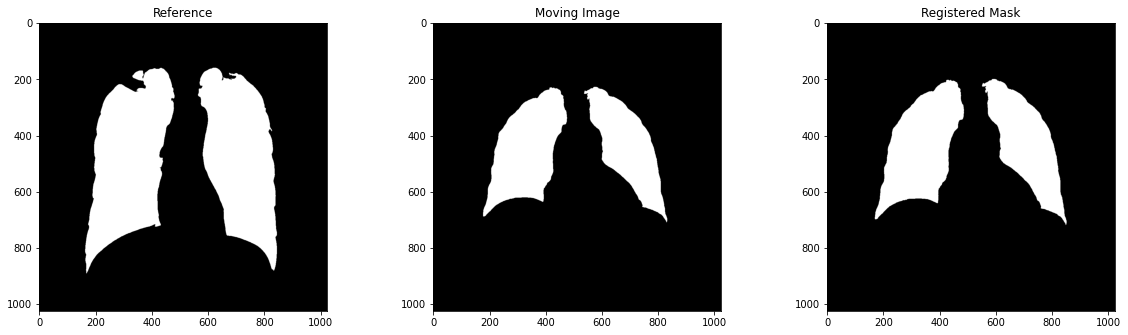

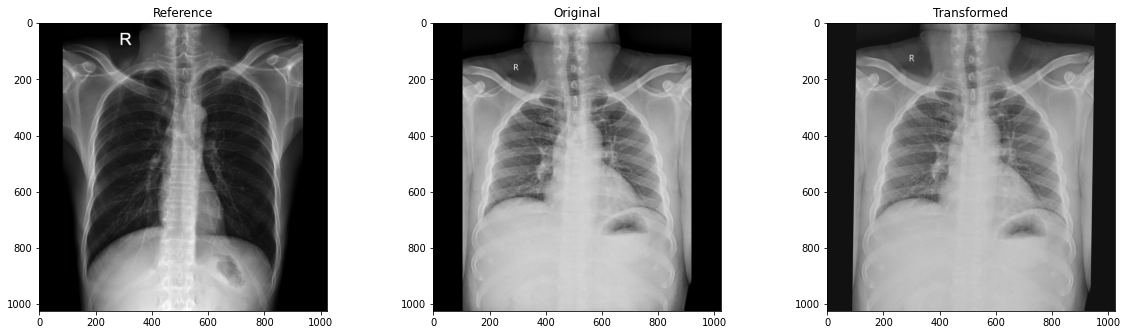

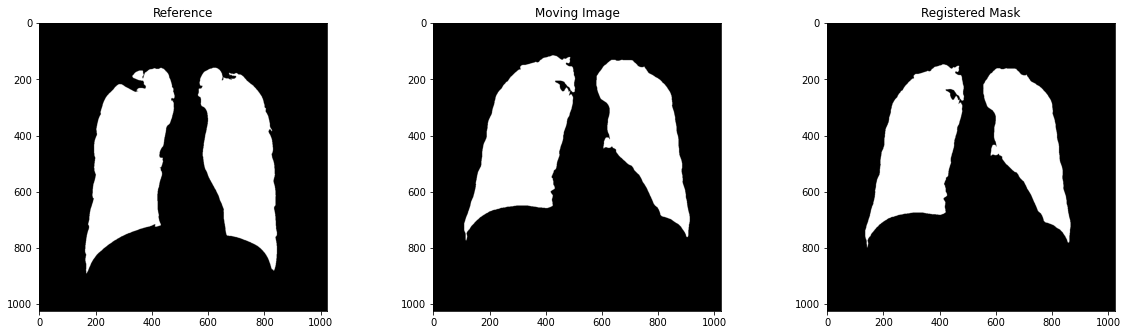

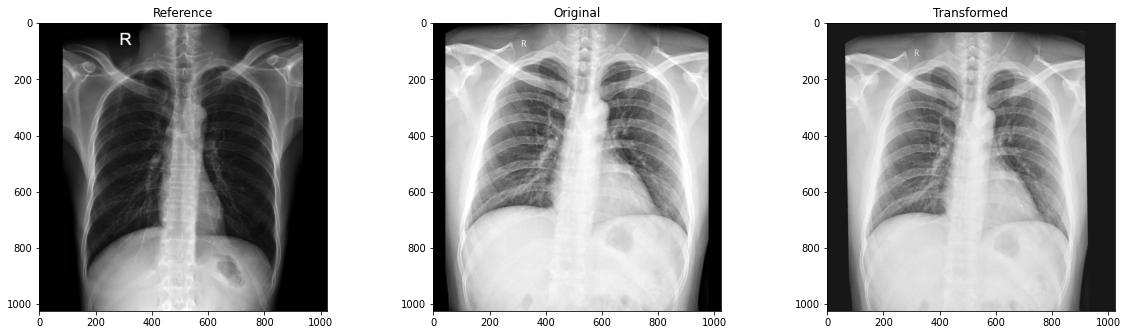

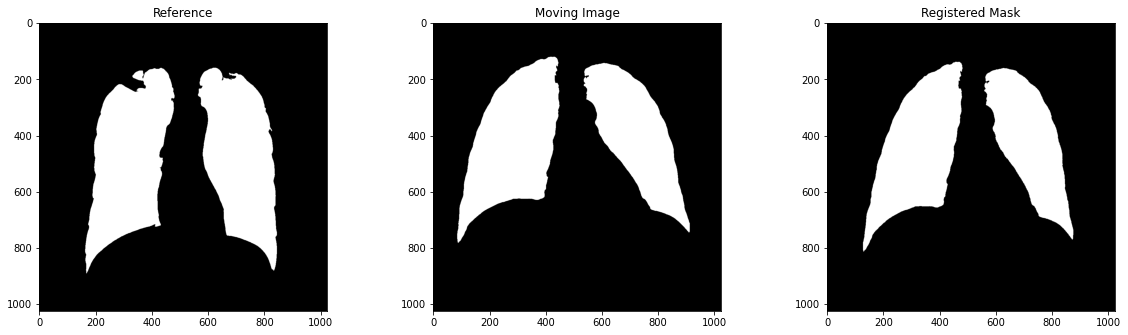

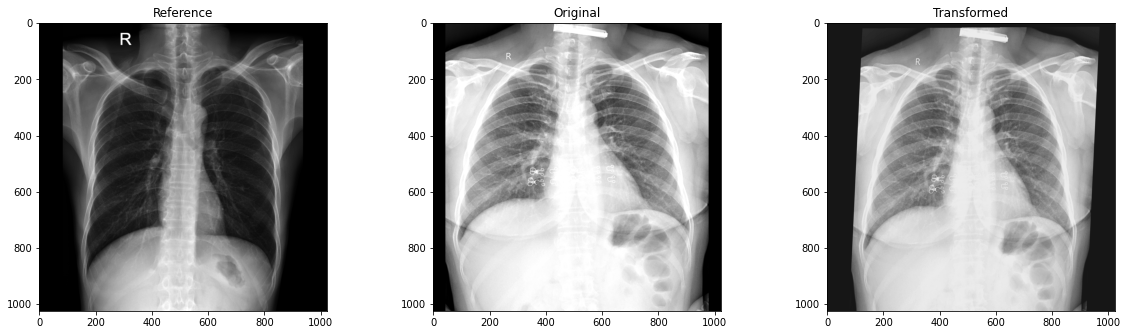

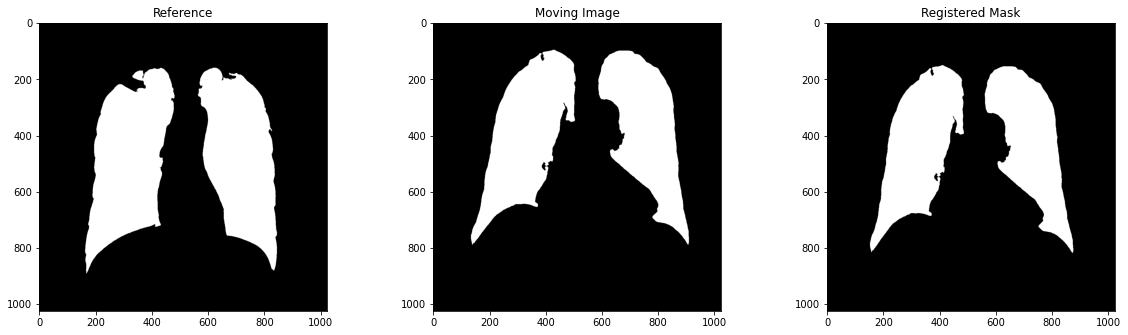

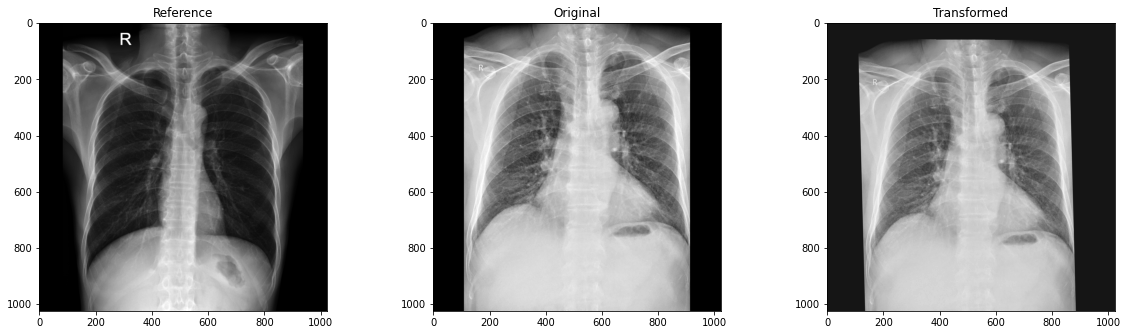

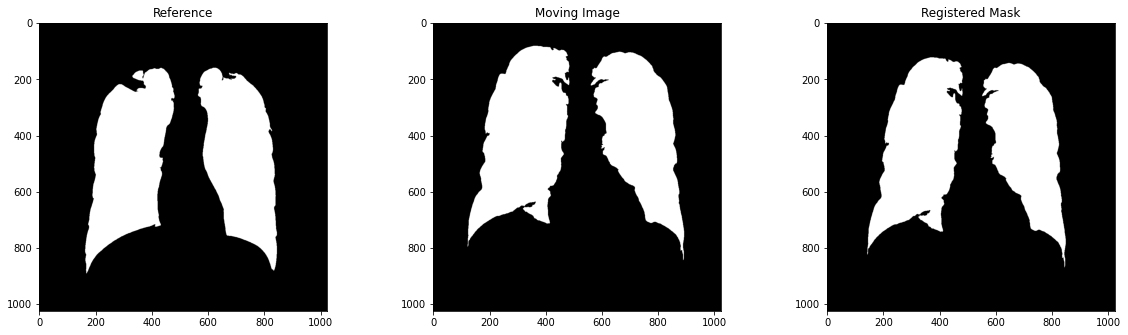

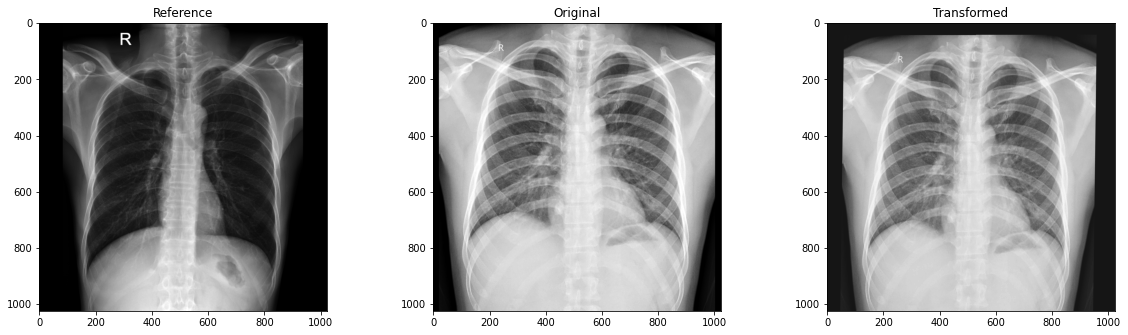

In [3]:
%%time
fixedImage = sitk.ReadImage(refMask_path, sitk.sitkFloat32)
for filename in os.listdir(input_path):
    if filename.endswith(".png"):
        print(filename)
        path = os.path.join(input_path, filename)
        movingImage = sitk.ReadImage(path, sitk.sitkFloat32)
        path2 = os.path.join(masks_dest, filename) 
        ri, tpm = affine_registration(fixedImage, movingImage)
        path3 = os.path.join(pngs, filename)
        img = sitk.ReadImage(path3.replace('_Mask.png', '.png'), sitk.sitkFloat32)
        k = apply_transform(tpm, img)
        org = sitk.GetArrayFromImage(img)
        tr = sitk.GetArrayFromImage(k)
        res = sitk.GetArrayFromImage(ri)
        ret, res = cv2.threshold(res, 120, 255, cv2.THRESH_BINARY)
        reference = sitk.GetArrayFromImage(fixedImage)  
        to_register = sitk.GetArrayFromImage(movingImage)
        fix = sitk.GetArrayFromImage(sitk.ReadImage(ref_path, sitk.sitkFloat32))

        plt.figure(figsize=(20, 18))
        plt.subplot(3, 3, 1)
        plt.title('Reference')
        plt.imshow(reference, cmap='gray')
        plt.subplot(3, 3, 2)
        plt.title('Moving Image')
        plt.imshow(to_register, cmap='gray')
        plt.subplot(3, 3, 3)
        plt.title('Registered Mask')
        plt.imshow(res, cmap='gray')
        plt.figure(figsize=(20, 18))
        plt.subplot(3, 3, 4)
        plt.title('Reference')
        plt.imshow(fix, cmap='gray')
        plt.subplot(3, 3, 5)
        plt.title('Original')
        plt.imshow(org, cmap='gray')
        plt.subplot(3, 3, 6)
        plt.title('Transformed')
        plt.imshow(tr, cmap='gray')
        
        result = Image.fromarray(res)
        result.convert('P').save(path2.replace('.png','_SimpleElastix.png'), 'PNG')

    else:
        continue
